# Part 2: Highlighting with Transformers

In Part 1, we gave a general overview of txtmarker, the backing technology and examples of how to use it for similarity searches. This notebook builds on that and demonstrates more advanced functionality. 

This notebook uses [Hugging Face Transformers](https://github.com/huggingface/transformers) to run [extractive question-answering](https://huggingface.co/transformers/usage.html#extractive-question-answering) and highlights answers within a set of articles. 


# Install dependencies

Install txtmarker and dependencies

In [1]:
%%capture

# Install pdf2image - embeds pdf as image in notebook
!apt-get update
!apt-get install poppler-utils
!pip install pdf2image

# Install transformers
!pip install transformers

# Install txtmarker
!pip install git+https://github.com/neuml/txtmarker

# Get test files
!wget https://github.com/neuml/txtmarker/releases/download/v0.0.0/tests.tar.gz
!tar -xvzf tests.tar.gz

# Base functionality

This section defines helper methods to run QA and highlighting.

In [2]:
%%capture
import re

from pdf2image import convert_from_path
from pdfminer.high_level import extract_text
from transformers import pipeline

from IPython.display import display

from txtmarker.factory import Factory

# Create pipeline
nlp = pipeline("question-answering")

# Create highlighter
highlighter = Factory.create("pdf")

# Extracts text from pdf
def extract(path):
  text = extract_text(path)

  # Clean data
  text = re.sub(r"\n+", " ", text)
  return re.sub(r"[^\x20-\x7F]+", "", text)

# Renders first page of pdf file as image
def highlight(path, highlights):
  # Get PDF text
  context = extract(path)

  # Run extractive qa
  highlights = [(name, qa(context, question)) for name, question in highlights]

  # Create annotated file
  highlighter.highlight(path, "out.pdf", highlights)

  # Render pdf as image
  images = convert_from_path("out.pdf", size=(800, None), single_file=True)
  display(images[0])

# Runs extractive qa
def qa(context, question):
  return nlp(context=context, question=question)["answer"]


# Ask questions and highlight the answers - Part 1

The first example we'll explore runs queries against a [Medium article](https://towardsdatascience.com/building-a-sentence-embedding-index-with-fasttext-and-bm25-f07e7148d240) about hashing.

In this example, the following questions are run against the PDF and the answers are highlighted. 

Why read 📚 when Transformers can do the hard work for us? Better yet, it can at least point out the things we care about! Maybe we don't want to just take Transformers word for it but want to see the context. 

The combination is pretty 🔥🔥🔥

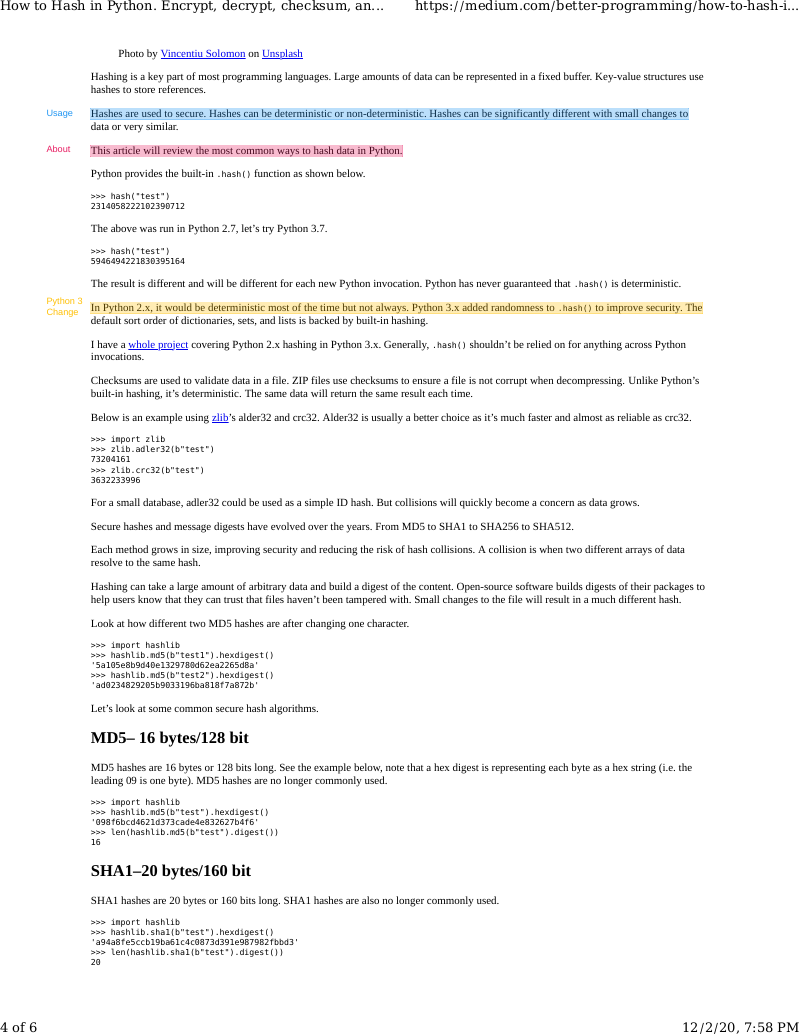

In [3]:
highlight("txtmarker/hash.pdf", [
  ("About", "What is this article about?"),
  ("Usage", "How are hashes used?"),
  ("Python 3 Change", "What was added to hashing in Python3?")
])

# Ask questions and highlight the answers - Part 2

Next example using this [Medium article](https://medium.com/better-programming/how-to-hash-in-python-8bf181806141) about embeddings. Like the previous example, a list of questions is run and the answers highlighted.



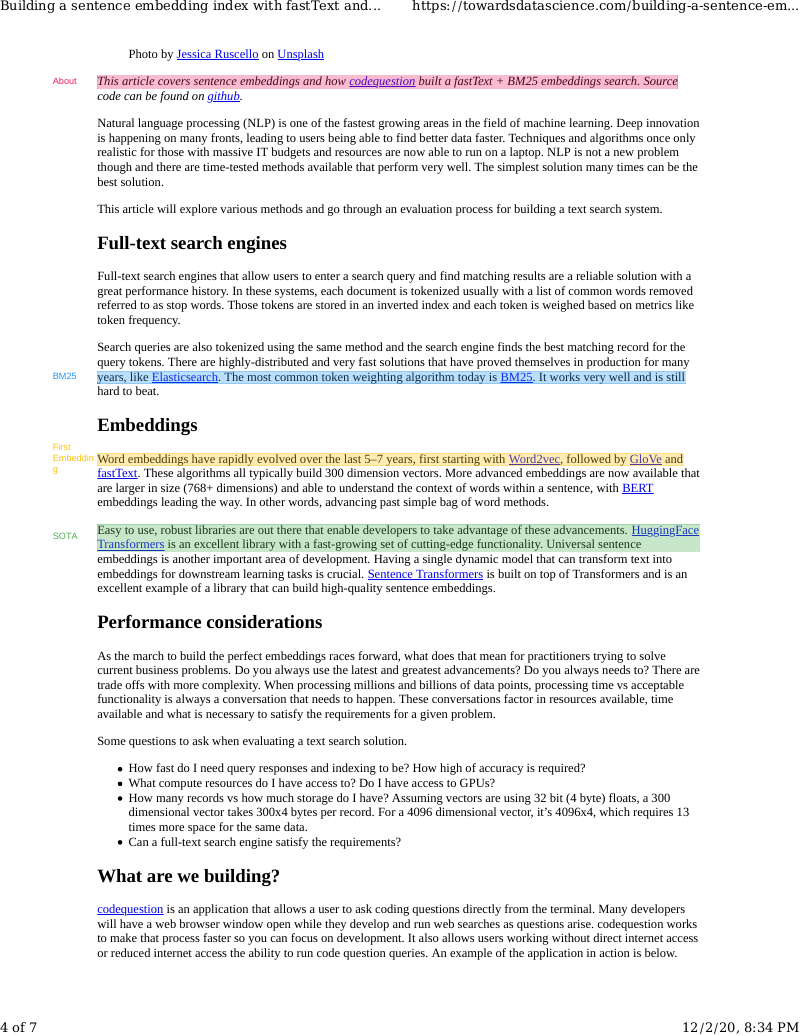

In [4]:
highlight("txtmarker/embeddings.pdf", [
  ("About", "What is this article about?"),
  ("BM25", "What is BM25?"),
  ("First Embedding", "What was the earliest embedding method?"),
  ("SOTA", "What provides cutting-edge functionality?")
])

# More complex layout

The next example takes the NeuML website exported as a PDF. This layout is more complex with multiple columns and images embedded. txtmarker will render the highlights using the optimal placement for the highlighted text.

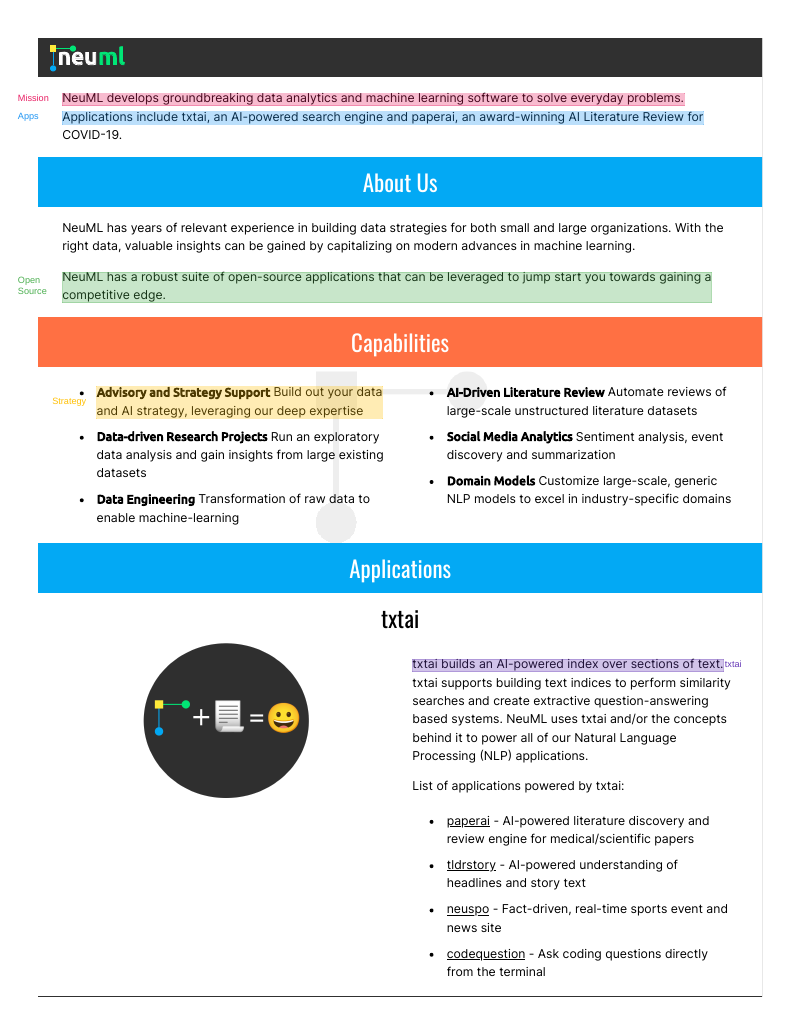

In [5]:
highlight("txtmarker/neuml.pdf", [
  ("Mission", "What is NeuML's mission"),
  ("Apps", "What applications were developed?"),
  ("Strategy", "Can NeuML advise on ML strategy?"),
  ("Open Source", "How does NeuML use open source?"),
  ("txtai", "What does txtai do?")
])